Notebook: Random Forest Model Evaluation for Stock Price Prediction

Objective

This notebook evaluates the machine learning model trained using a Random Forest Regressor for individual stock tickers. It performs the following:

•	Loads preprocessed stock data and the trained model for the selected ticker.

•	Predicts stock prices (Adj Close) using the Random Forest model.

•	Evaluates model performance using metrics and visualizations.

Key Steps

1.	Set Default Ticker:

•	Define the stock ticker to evaluate.

•	Allow flexibility for future dynamic updates (e.g., via a web app).

2.	Load Data:

•	Fetch stock data specific to the selected ticker from the SQLite database.

3.	Load Model and Scaler:

•	Load the trained Random Forest model and corresponding scaler for the ticker.

4.	Normalize Features:

•	Apply the pre-trained scaler to ensure consistent input features for the model.

5.	Evaluate the Model:

•	Make predictions and calculate evaluation metrics (e.g., MAE, MSE, R²).
6.	Visualize Results:

•	Generate plots to analyze predictions and residuals.



Step-by-Step Explanation

Step 1: Import Required Libraries

This step imports all the necessary libraries:
	
•	pandas: For data manipulation and analysis.

•	sqlite3: For querying the SQLite database.

•	joblib: For loading the pre-trained model and scaler.

•	sklearn.metrics: For calculating model evaluation metrics (MAE, MSE, R²).

•	matplotlib.pyplot: For creating visualizations.



In [1]:
# Random Forest Model Evaluation Notebook

# Import necessary libraries
import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import sqlite3


Step 2: Load Data from SQLite Database

•	Purpose: Load the processed stock data from the SQLite database for the selected ticker.

•	Steps:

1.	Define the default ticker to evaluate (e.g., XOM for Exxon Mobil).

2.	Specify the SQLite database path.

3.	Query the processed_stocks table to filter data for the selected ticker.

4.	Load the results into a pandas DataFrame.

In [2]:

# Step 1: Load Data from SQLite Database
default_ticker = "XOM"
db_path = 'database/stocks_data.db'
with sqlite3.connect(db_path) as conn:
    query = f"SELECT * FROM processed_stocks WHERE Ticker = '{default_ticker}'"
    data = pd.read_sql(query, conn)
print(f"Loaded {data.shape[0]} rows for Ticker: {default_ticker}")


Loaded 11791 rows for Ticker: XOM


Step 3: Load Model and Scaler

•	Purpose: Load the pre-trained Random Forest model and scaler for the ticker.

•	Steps:

1.	Define file paths for the model and scaler (e.g., model_XOM_rf.pkl, scaler_XOM_rf.pkl).

2.	Use joblib.load() to load the model and scaler objects.

•	Output: Confirms successful loading of the model and scaler.

In [3]:

# Step 2: Load Model and Scaler
model_path = f'models/model_{default_ticker}_rf.pkl'
scaler_path = f'models/scaler_{default_ticker}_rf.pkl'
model = joblib.load(model_path)
scaler = joblib.load(scaler_path)
print(f"Loaded model and scaler for Ticker: {default_ticker}.")


Loaded model and scaler for Ticker: XOM.


Step 4: Define Features and Target

•	Purpose: Select features and the target variable for predictions.

•	Features (X):

•	7-day MA (Moving Average), 14-day MA, Volatility, Lag_1, Lag_2.

•	Target (y):

•	Adjusted Closing Price (Adj Close), representing actual stock prices.

In [4]:

# Step 3: Define Features and Target
features = ['7-day MA', '14-day MA', 'Volatility', 'Lag_1', 'Lag_2']
target = 'Adj Close'
X = data[features]
y = data[target]


Step 5: Normalize Features

•	Purpose: Standardize the feature values using the pre-trained scaler to ensure compatibility with the trained model.

•	Steps:

1.	Apply the scaler to transform the feature set (X).

2.	Normalization ensures consistent input ranges for the model.

In [5]:

# Step 4: Normalize Features
X_scaled = scaler.transform(X)


Step 6: Make Predictions and Evaluate the Model

•	Purpose: Assess the model’s performance using predictions.

•	Steps:

1.	Use the Random Forest model to predict stock prices (y_pred) based on normalized features.

2.	Calculate evaluation metrics:

•	Mean Squared Error (MSE): Measures average squared prediction errors.

•	Mean Absolute Error (MAE): Measures average absolute prediction errors.

•	R-squared (R²): Proportion of variance explained by the model.

3.	Print the metrics to understand the model’s accuracy and generalization.

In [6]:

# Step 5: Make Predictions and Evaluate Model
y_pred = model.predict(X_scaled)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Model Evaluation: MSE={mse:.2f}, MAE={mae:.2f}, R²={r2:.2f}")


Model Evaluation: MSE=0.15, MAE=0.15, R²=1.00


Step 7: Visualize Results

This step generates visualizations to analyze the model’s predictions and residuals.

7.1 Actual vs Predicted Prices

•	Scatter Plot: Compares actual and predicted stock prices.

•	Red Dashed Line: Represents the ideal fit (perfect predictions).

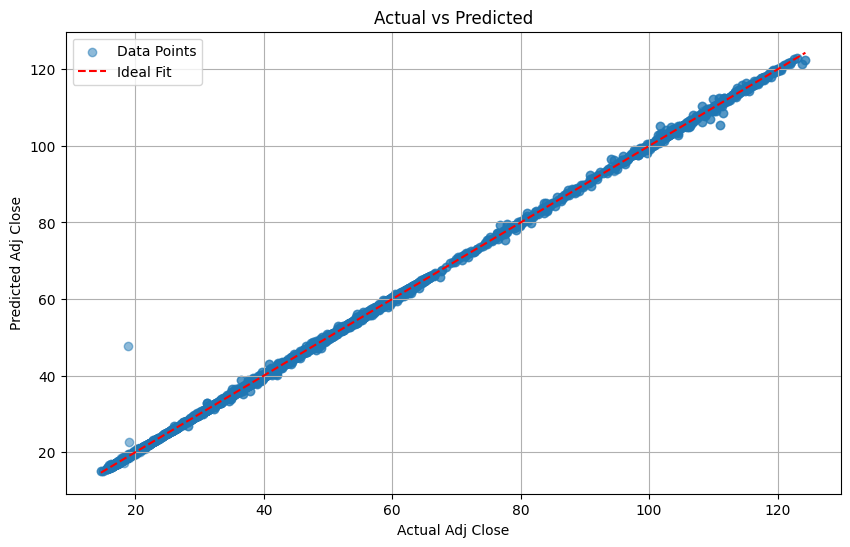

In [7]:

# Step 6: Visualize Results
# Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, label="Data Points")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Adj Close")
plt.ylabel("Predicted Adj Close")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()


7.2 Residual Distribution

•	Histogram: Displays the distribution of residuals (errors).

•	Red Dashed Line: Indicates zero error (perfect predictions).

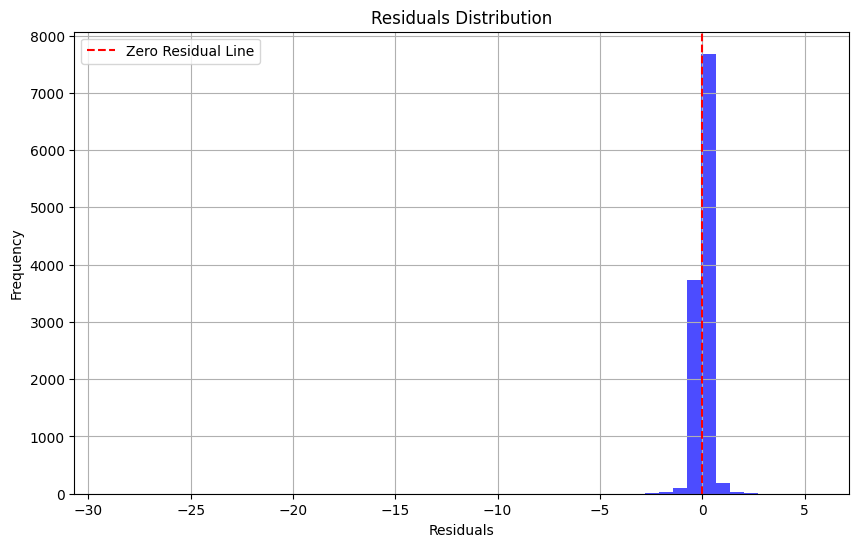

In [8]:

# Residual Distribution
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='blue', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label="Zero Residual Line")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()


7.3 Residuals vs Predicted Prices

•	Scatter Plot: Analyzes residuals as a function of predicted prices.

•	Red Dashed Line: Indicates zero error.

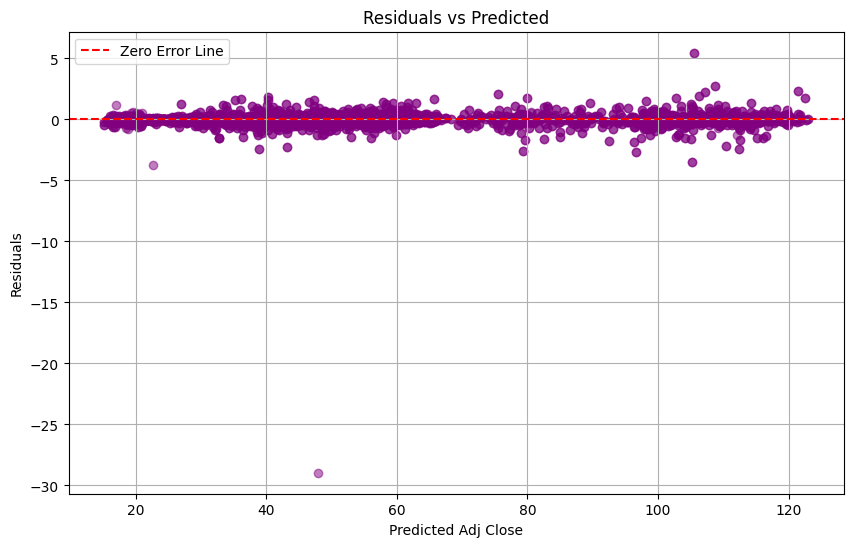

In [9]:

# Residuals vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color='red', linestyle='--', label="Zero Error Line")
plt.xlabel("Predicted Adj Close")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.legend()
plt.grid()
plt.show()

Summary

This notebook evaluates the trained Random Forest model by:

1.	Loading the Data and Model: Fetching the stock data and trained model/scaler for the selected ticker.

2.	Evaluating the Model: Calculating metrics to assess the model’s predictive accuracy.

3.	Visualizing Results: Using plots to compare predictions, analyze errors, and identify patterns in residuals.


Next Steps

1.	Integrate this evaluation process into the Flask web app.

2.	Extend visualizations for deeper analysis of model performance.